In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# generate dataset

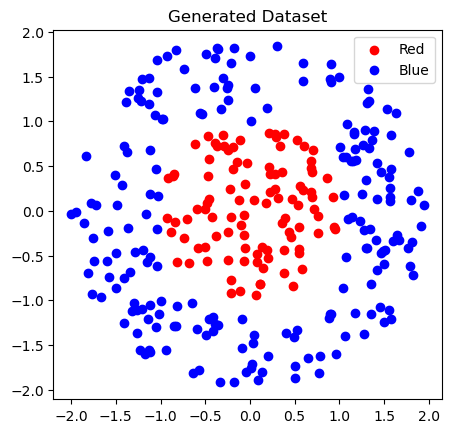

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Number of points for each class
num_points_red = 100
num_points_blue = 300

# Generate red points inside the circle
theta_red = np.random.uniform(0, 2*np.pi, num_points_red)
radius_red = np.sqrt(np.random.uniform(0, 1, num_points_red))
red_x = radius_red * np.cos(theta_red)
red_y = radius_red * np.sin(theta_red)

# Generate blue points inside a circle
theta_blue = np.random.uniform(0, 2*np.pi, num_points_blue)
radius_blue = 2 * np.sqrt(np.random.uniform(0, 1, num_points_blue))  # Radius of the circle for blue points
blue_x = radius_blue * np.cos(theta_blue)
blue_y = radius_blue * np.sin(theta_blue)

mask = ~((blue_x >= -1) & (blue_x <= 1) & (blue_y >= -1) & (blue_y <= 1))
blue_x = blue_x[mask]
blue_y = blue_y[mask]

# Plot the data with equal aspect ratio
plt.scatter(red_x, red_y, color='red', label='Red')
plt.scatter(blue_x, blue_y, color='blue', label='Blue')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# Set plot limits
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Set equal aspect ratio
plt.gca().set_aspect('equal', adjustable='box')


plt.title('Generated Dataset')
plt.legend()

# Show the plot
plt.show()


# decision boundary

Accuracy: 0.62


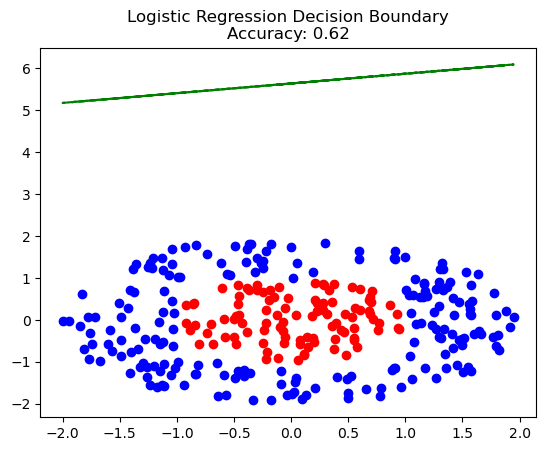

In [134]:

# Combine red and blue points
X = np.vstack((np.column_stack((red_x, red_y)), np.column_stack((blue_x, blue_y))))
y = np.hstack((np.zeros(num_points_red), np.ones(len(blue_x))))  # Adjust here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Extract coefficients and intercept
coef = model.coef_[0]
intercept = model.intercept_

# Plot the data with equal aspect ratio
plt.scatter(red_x, red_y, color='red', label='Red')
plt.scatter(blue_x, blue_y, color='blue', label='Blue')


y_values = (-intercept - coef[0] * X) / coef[1]
plt.plot(X, y_values, label='Decision Boundary', color='green', linestyle='--')

plt.title(f'Logistic Regression Decision Boundary\nAccuracy: {accuracy:.2f}')

# Show the plot
plt.show()


# Convert Cartesian coordinates to polar coordinates

Accuracy: 1.00


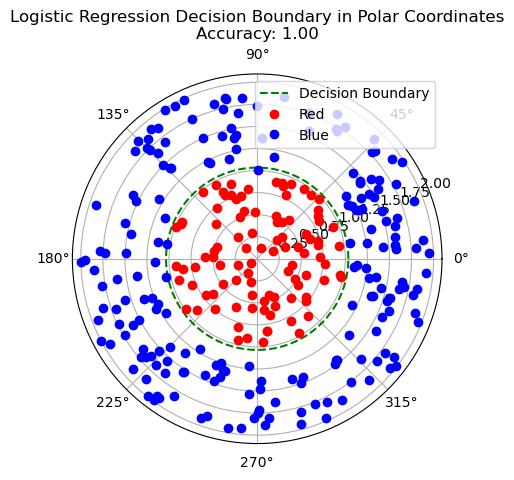

In [135]:

# Convert Cartesian coordinates to polar coordinates
def cartesian_to_polar(x, y):
    radius = np.sqrt(x**2 + y**2)
    angle = np.arctan2(y, x)
    return radius, angle

red_radius, red_angle = cartesian_to_polar(red_x, red_y)
blue_radius, blue_angle = cartesian_to_polar(blue_x, blue_y)

# Combine red and blue points in polar coordinates
X_polar = np.vstack((np.column_stack((red_radius, red_angle)), np.column_stack((blue_radius, blue_angle))))
y = np.hstack((np.zeros(num_points_red), np.ones(len(blue_radius))))  # Adjust here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_polar, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary in polar coordinates
theta = np.linspace(0, 2*np.pi, 100)
r_decision_boundary = -model.intercept_ / model.coef_[0][0]
plt.polar(theta, [r_decision_boundary] * 100, label='Decision Boundary', color='green', linestyle='--')

# Plot the data in polar coordinates
plt.polar(red_angle, red_radius, 'ro', label='Red')
plt.polar(blue_angle, blue_radius, 'bo', label='Blue')

plt.title(f'Logistic Regression Decision Boundary in Polar Coordinates\nAccuracy: {accuracy:.2f}')
plt.legend()
plt.show()